In [1]:
import os

IMAGE_PATH = "/kaggle/input/face-detection-dataset/images"
LABEL_PATH = "/kaggle/input/face-detection-dataset/labels"

train_image_path = os.path.join(IMAGE_PATH, "train")
val_image_path = os.path.join(IMAGE_PATH, "val")

train_label_path = os.path.join(LABEL_PATH, "train")
val_label_path = os.path.join(LABEL_PATH, "val")

train_images = os.listdir(train_image_path)
train_labels = os.listdir(train_label_path)

val_images = os.listdir(val_image_path)
val_labels = os.listdir(val_label_path)

print(f"Train : {len(train_images)}\tTest : {len(val_images)}")

Train : 13386	Test : 3347


In [2]:
import cv2

def read_annotations(file_path: str) -> list:
    with open(file_path, "r") as file:
        return [
            (int(parts[0]), float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4]))
            for line in file
            for parts in [line.strip().split()]
        ]

def draw_bounding_boxes(image: str, annotations: list) -> str:
    img_height, img_width, _ = image.shape
    for class_id, x_center, y_center, width, height in annotations:
        x_center, y_center = int(x_center * img_width), int(y_center * img_height)
        box_width, box_height = int(width * img_width), int(height * img_height)
        x1, y1 = x_center - box_width // 2, y_center - box_height // 2
        x2, y2 = x_center + box_width // 2, y_center + box_height // 2
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return image

In [3]:
import matplotlib.pyplot as plt

def plot_images(images_dir: str, annotations_dir: str, num_images: int = 2):
    for plot_count, image_name in enumerate(os.listdir(images_dir)):
        if plot_count >= num_images:
            break

        image_path = os.path.join(images_dir, image_name)
        annotation_path = os.path.join(annotations_dir, os.path.splitext(image_name)[0] + ".txt")

        if os.path.exists(annotation_path):
            image = cv2.imread(image_path)
            annotations = read_annotations(annotation_path)
            image_with_boxes = draw_bounding_boxes(image, annotations)

            plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.show()

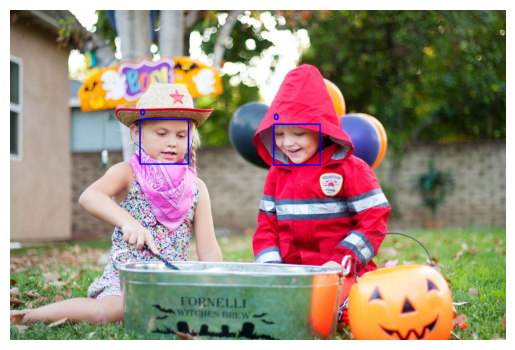

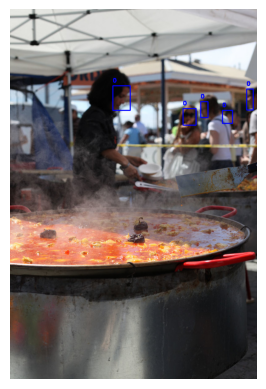

In [4]:
plot_images(train_image_path, train_label_path)

# Train using YOLO

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 30.5 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
cfg = {
    'names': ['Face'],
    
    'path': '/kaggle/input/face-detection-dataset',  # root folder for dataset
    'train': 'images/train',  # relative to 'path'
    'val': 'images/val',      # relative to 'path'
}

with open('data_config.yaml', 'w') as f:
    yaml.dump(cfg, f)

In [8]:
model = YOLO('yolo11n.pt')
model.train(data='data_config.yaml', epochs=20)

100%|██████████| 5.35M/5.35M [00:00<00:00, 175MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data_config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 37.0MB/s]
2024-11-10 11:05:13,271	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-10 11:05:14,664	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/face-detection-dataset/labels/train... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [01:22<00:00, 161.63it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/face-detection-dataset/labels/val... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:21<00:00, 157.66it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.59G      1.412      1.356      1.193         56        640: 100%|██████████| 837/837 [03:17<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:21<00:00,  4.81it/s]


                   all       3347      10299      0.826       0.68      0.756      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.48G      1.338     0.9388      1.157         53        640: 100%|██████████| 837/837 [03:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.16it/s]


                   all       3347      10299      0.857      0.679      0.779       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.16G      1.328     0.8941      1.151         58        640: 100%|██████████| 837/837 [03:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.15it/s]


                   all       3347      10299      0.831      0.595      0.685      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.49G      1.303     0.8553       1.14         74        640: 100%|██████████| 837/837 [03:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.31it/s]


                   all       3347      10299      0.879      0.726      0.808      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.31G      1.271     0.8072      1.121         27        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.22it/s]


                   all       3347      10299      0.881      0.743      0.827      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.23G      1.256     0.7814      1.117         50        640: 100%|██████████| 837/837 [03:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.15it/s]


                   all       3347      10299      0.874      0.751      0.833      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.93G      1.239     0.7658      1.105        105        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.32it/s]


                   all       3347      10299      0.881      0.767      0.842      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.46G      1.231     0.7517        1.1         40        640: 100%|██████████| 837/837 [03:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.22it/s]


                   all       3347      10299      0.878       0.77      0.847       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.22G      1.213     0.7299      1.093         48        640: 100%|██████████| 837/837 [03:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.32it/s]


                   all       3347      10299      0.885       0.77      0.852      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       3.1G      1.201     0.7108      1.086         41        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.37it/s]


                   all       3347      10299      0.887      0.772      0.852      0.558
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.47G        1.2     0.6748      1.085         21        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.15it/s]


                   all       3347      10299       0.89      0.774      0.853      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.45G      1.191     0.6593      1.079         24        640: 100%|██████████| 837/837 [03:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.11it/s]


                   all       3347      10299      0.891      0.778      0.857       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.13G      1.174     0.6437      1.072         19        640: 100%|██████████| 837/837 [03:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.18it/s]


                   all       3347      10299      0.887      0.785      0.862      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.45G      1.172     0.6303      1.069         33        640: 100%|██████████| 837/837 [03:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.34it/s]


                   all       3347      10299      0.894      0.787      0.865      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.67G      1.159     0.6194      1.062         25        640: 100%|██████████| 837/837 [03:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.24it/s]


                   all       3347      10299      0.898      0.783      0.866      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.18G      1.149     0.6011      1.055         20        640: 100%|██████████| 837/837 [03:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.23it/s]


                   all       3347      10299      0.897       0.79      0.869      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.26G      1.146     0.5925      1.054         21        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.31it/s]


                   all       3347      10299      0.891       0.79       0.87      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.25G      1.132     0.5787      1.046         25        640: 100%|██████████| 837/837 [03:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:19<00:00,  5.30it/s]


                   all       3347      10299      0.899      0.793      0.874       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.23G      1.122     0.5649      1.042         32        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.08it/s]


                   all       3347      10299      0.892      0.798      0.876      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.14G      1.114     0.5534      1.038         34        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.03it/s]


                   all       3347      10299      0.898      0.795      0.877      0.585

20 epochs completed in 1.142 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:22<00:00,  4.62it/s]


                   all       3347      10299      0.898      0.795      0.877      0.585
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a7d166dd060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model.export(format='onnx')


Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 226.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 200.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 229.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 20.7s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.36...
ONNX: ex

'runs/detect/train/weights/best.onnx'